# Nicht generatives Trainig mit DeepHull simple loss

In [17]:
from script.NeuralNets.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification.Verification import verification

In [18]:
sequential = False
epochs = 3
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

if not sequential:
    icnn = ICNN([2, 10, 10, 1])
else:
    icnn = SequentialNN([2, 10, 10, 1])

In [19]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()

dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

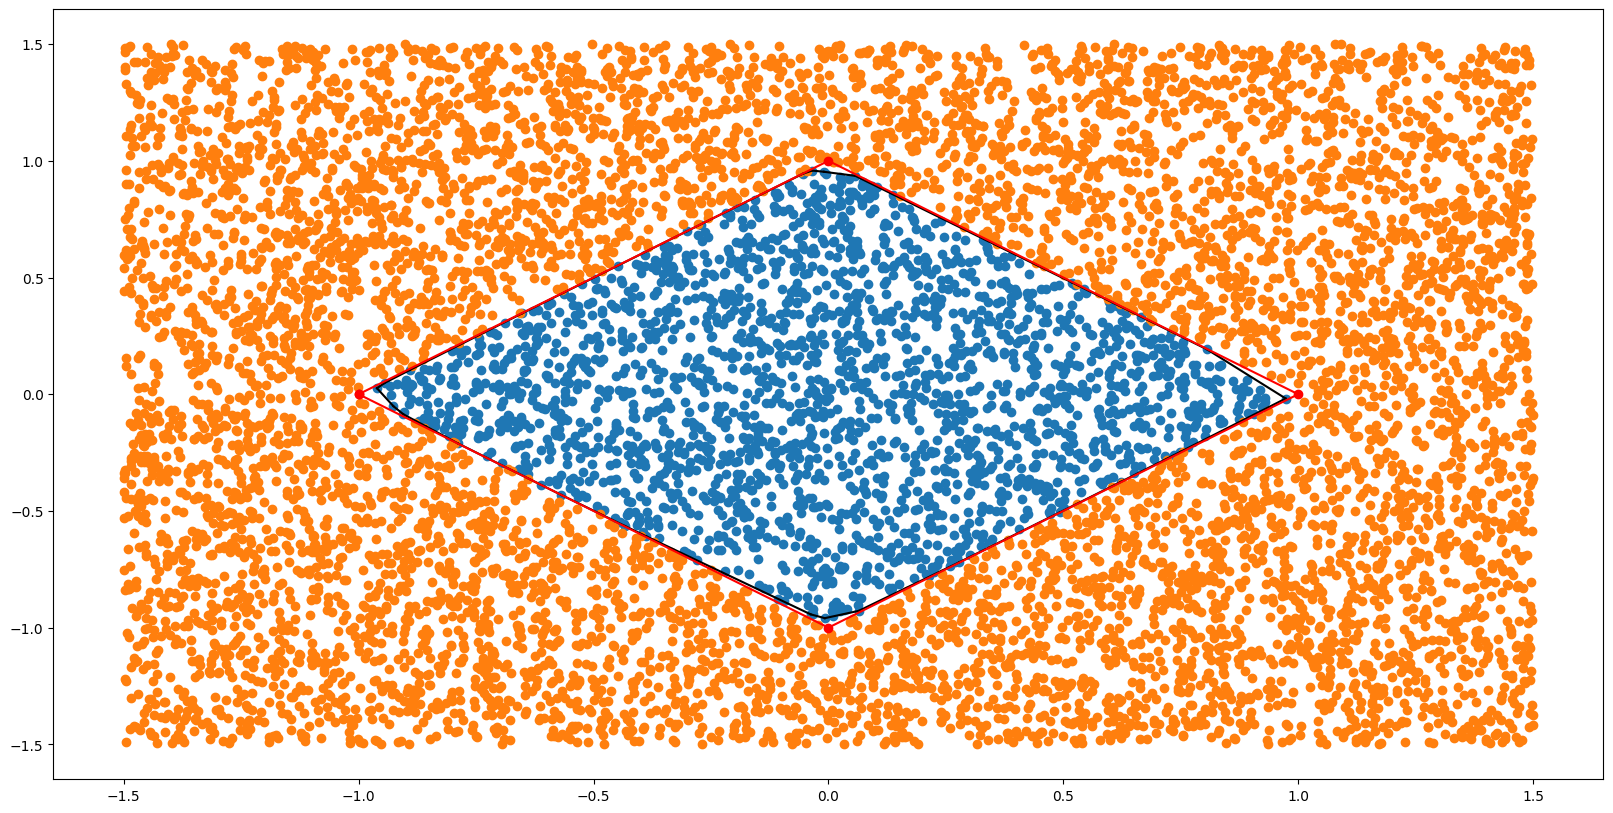

In [20]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range)
plots.plt_initial()

In [21]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, sequential=sequential, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 1.5840918548358238
batch = 100, mean loss = 1.3942469436809815
batch = 200, mean loss = 1.369663952010357
batch = 300, mean loss = 1.3478893849585178
batch = 400, mean loss = 1.3135283136157792
batch = 500, mean loss = 1.28046375337026
batch = 600, mean loss = 1.2576857923271039
batch = 700, mean loss = 1.2240126280547434
batch = 800, mean loss = 1.2003640145915608
batch = 900, mean loss = 1.175242757527895
batch = 1000, mean loss = 1.152483339387985
batch = 1100, mean loss = 1.1320619633501785
batch = 1200, mean loss = 1.103872550828541
batch = 1300, mean loss = 1.0828807297478373
batch = 1400, mean loss = 1.064248548567176
batch = 1500, mean loss = 1.043012179606645
batch = 1600, mean loss = 1.0245678775484246
batch = 1700, mean loss = 1.0077245957097205
batch = 1800, mean loss = 0.9900719952623986
batch = 1900, mean loss = 0.9727285237297466
batch = 2000, mean loss = 0.9567110470730723
batch = 2100, mean loss = 0.9388174680830474
batch = 2200, 

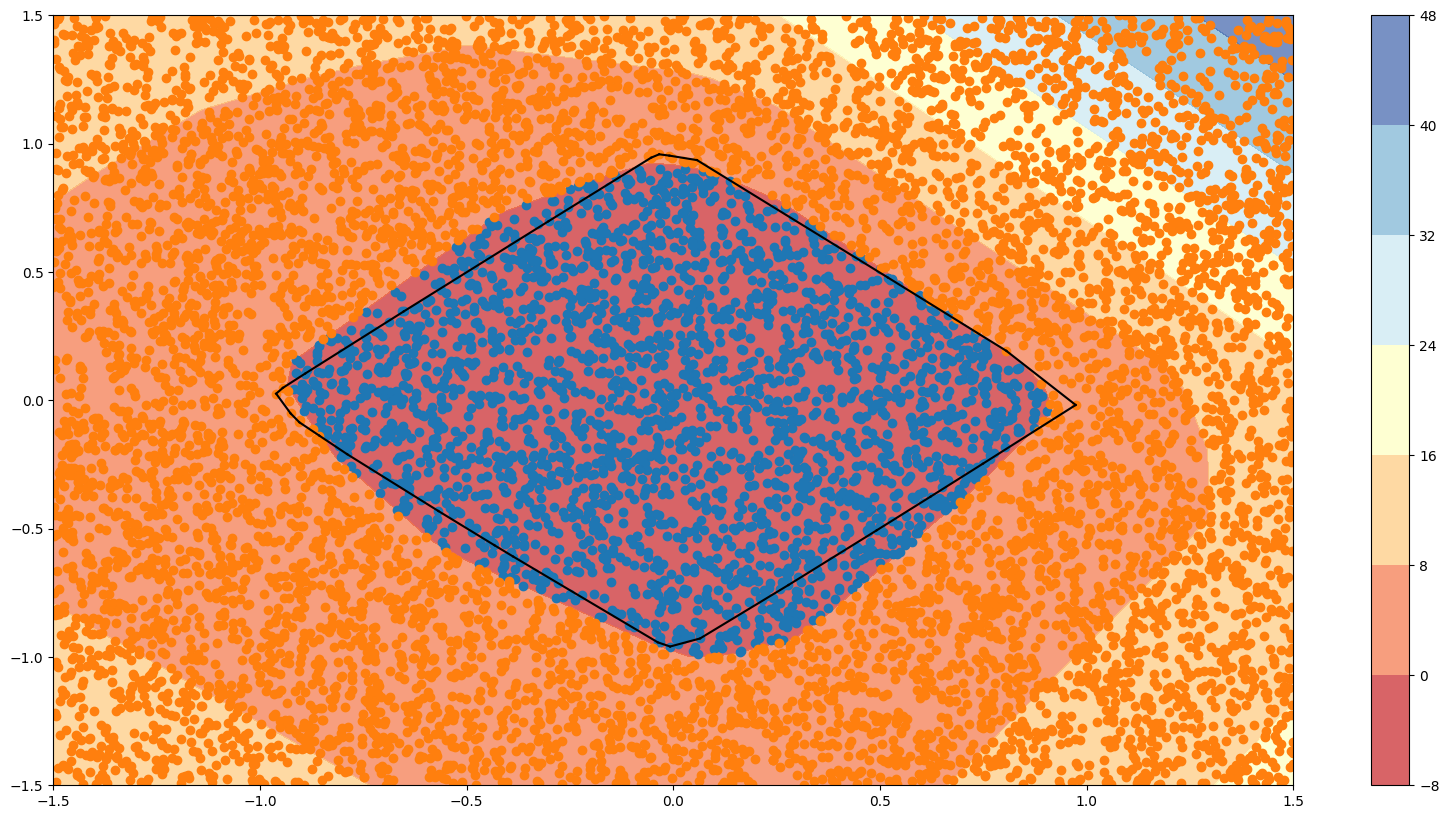

In [22]:
plots.plt_mesh()

In [23]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A_b=[A, b], sequential=sequential)

optimum solution at: [1. 0.], with value [2.1419607], true output: 0


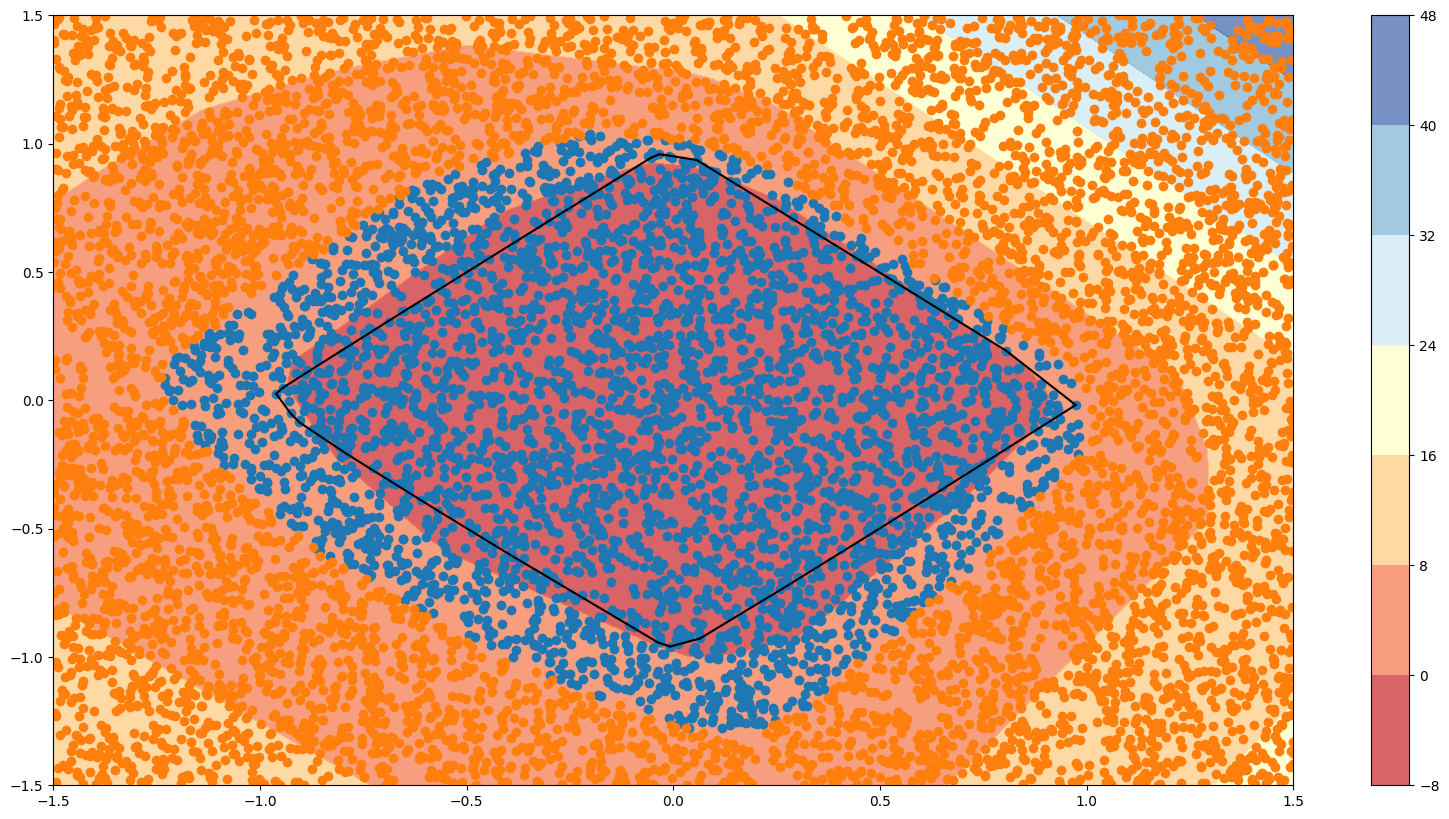

In [24]:
input_data, plots.c = result
plots.plt_mesh()